# 1. Problem Statement

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  


# 2. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Import Dataset

In [2]:
df=pd.read_csv('Advertising.csv')

In [3]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# 4. Basis Analysis of data

In [4]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.shape

(200, 5)

**Dataset is having 200 observation with 5 columns.**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


Observation point:
1. Unnamed columns is not require so we need to drop this.
2. All columns data type are in float.
3. It seems there is no null value we will confirm this.

In [7]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Observation point:
1. There is no null value in columns
2. The mean and median of columns are almost same, so data would be normal distribution.will confirm this.
3. In radio there is minimum sale of zero.


# 5. Checking the null value in dataset

In [8]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

**we don't have null value in data set.**

# 6.Univariate Analysis

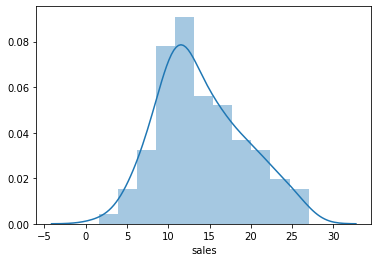

In [9]:
sns.distplot(df["sales"])

**As we can see our target varialbe is normal distribution.**

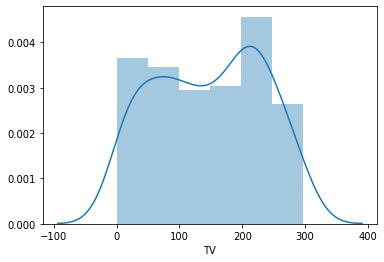

In [10]:
sns.distplot(df["TV"])

**TV data looks like normal distribution.**

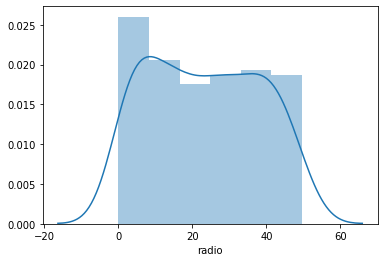

In [11]:
sns.distplot(df["radio"])

**Radio data looks like normal distribution.**

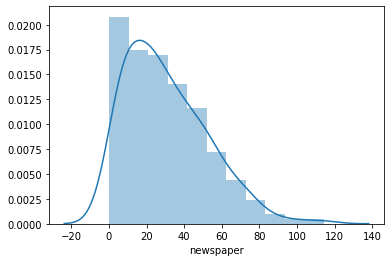

In [12]:
sns.distplot(df["newspaper"])

**As we can newspaper data is little right skewed.**

# 7.Bivariate Analysis

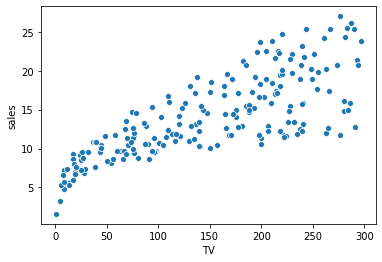

In [13]:
sns.scatterplot(x="TV",y="sales",data=df)

**we can interpret that tv and sale having linear releation means data have regression in nature.**

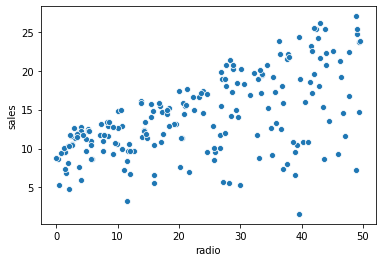

In [14]:
sns.scatterplot(x="radio",y="sales",data=df)

**Radio also have some extend to linear regression in nature.**

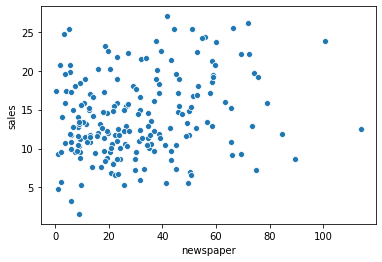

In [15]:
sns.scatterplot(x="newspaper",y="sales",data=df)

**Newspaper doesn't follow linear regression, data points are scatter across.**

# 8. Dropping unwanted columns

In [16]:
df=df.drop("Unnamed: 0",axis=1)

In [17]:
df.shape

(200, 4)

# 9.Multivariate Analysis

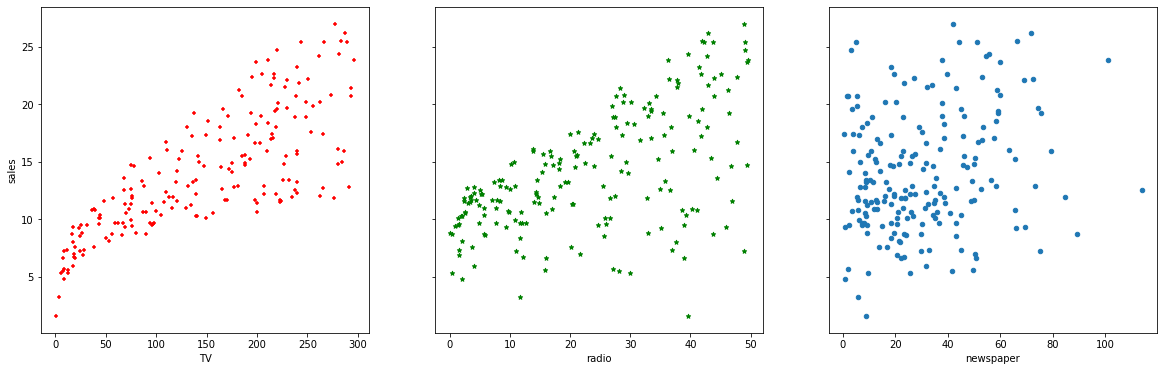

In [18]:
fig,axs=plt.subplots(1,3,sharey=True)## sharey works only to put y axis one time
df.plot(kind="scatter",x="TV",y="sales",ax=axs[0],figsize=(20,6),color="r",marker="+")
df.plot(kind="scatter",x="radio",y="sales",ax=axs[1],color="g",marker="*")
df.plot(kind="scatter",x="newspaper",y="sales",ax=axs[2])

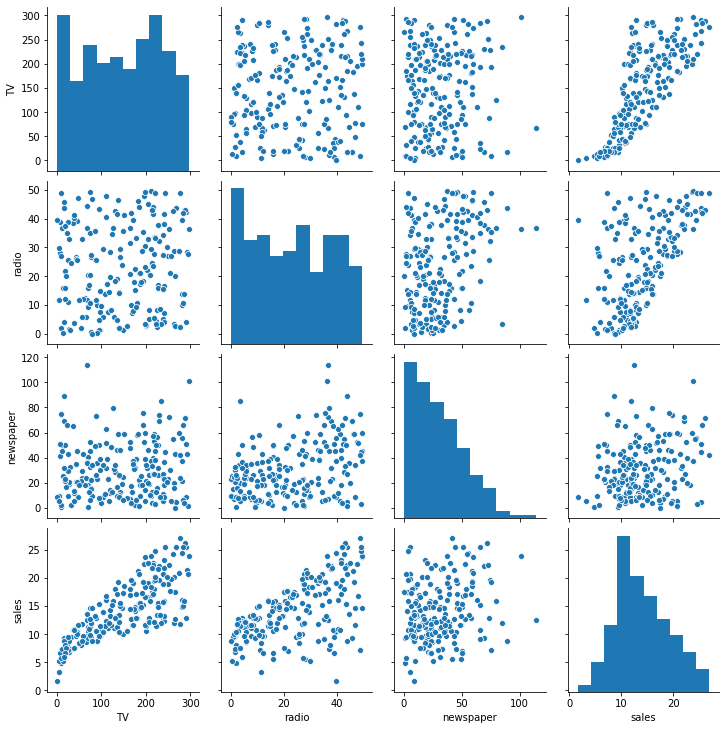

In [19]:
sns.pairplot(df)

**here we can analyse the relationship between features and also feature vs target variable.**

In [20]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


**As we can interpret here that TV is highlty correleated with sales compared to radio and newspaper.**

In [21]:
df.corr()["sales"]

TV           0.782224
radio        0.576223
newspaper    0.228299
sales        1.000000
Name: sales, dtype: float64

**Easily we can interpret that TV,radio and newspaper correlation with sales.**

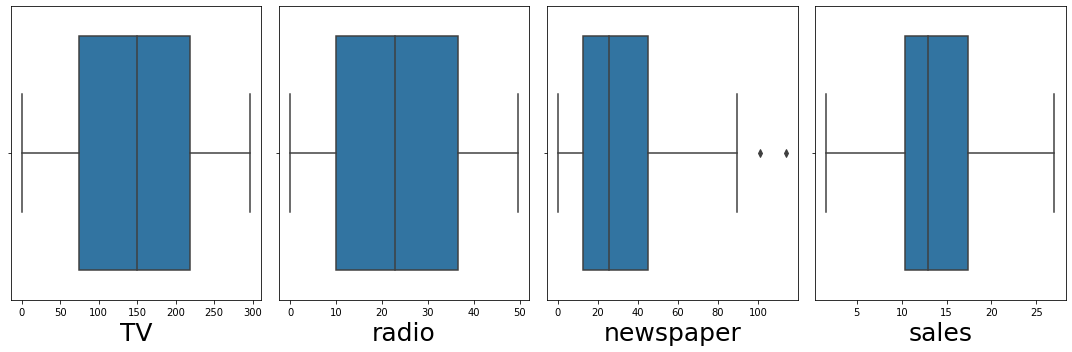

In [22]:
plt.figure(figsize=(15,5))
plotnumber=1
for column in df:
    if plotnumber<=4:
        ax=plt.subplot(1,4,plotnumber)
        sns.boxplot(df[column],)
        plt.xlabel(column,fontsize=25)
        
        plotnumber+=1
plt.tight_layout()
    

**As we can see newspaper having some outlier.**

In [23]:
df["total_spend"]=df["TV"]+df["newspaper"]+df["radio"]

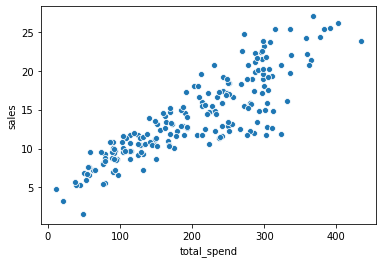

In [24]:
sns.scatterplot(x="total_spend",y="sales",data=df)

**As we can see after adding up to all spend advertisment type and plotting with sales the data having linear relationship.**

In [25]:
df.skew()

TV            -0.069853
radio          0.094175
newspaper      0.894720
sales          0.407571
total_spend    0.049488
dtype: float64

**As we can see that newspaper is skeweed.**

# 10. Dealing with outliers

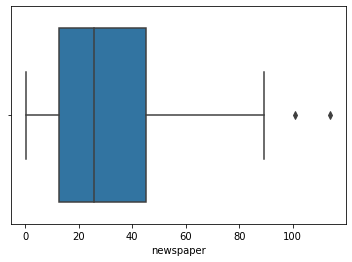

In [26]:
sns.boxplot(df["newspaper"])

In [27]:
upper_limit = df["newspaper"].mean() + 3*df["newspaper"].std()
lower_limit = df["newspaper"].mean() - 3*df["newspaper"].std()

In [28]:
df['newspaper'] = np.where(
    df['newspaper']>upper_limit,
    upper_limit,
    np.where(
        df['newspaper']<lower_limit,
        lower_limit,
        df['newspaper']
    )
)

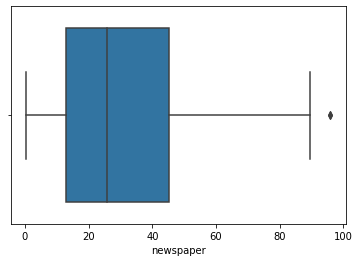

In [29]:
sns.boxplot(df["newspaper"])

In [30]:
df.skew()

TV            -0.069853
radio          0.094175
newspaper      0.768629
sales          0.407571
total_spend    0.049488
dtype: float64

# 11. Scaling with Standard Scaler

In [31]:
x=df.drop(columns="sales",axis=1)

In [32]:
y=df.sales

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler=StandardScaler()

In [35]:
x_scaled = scaler.fit_transform(x)

# 11. Model Building

# 11.1 Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lr=LinearRegression()

In [38]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
lr=LinearRegression()
for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At random state",i,"Model perfrom well")
        print("At random state",i)
        print("Training R2_score is-",r2_score(y_train,pred_train)*100)
        print("Testing R2_score is-",r2_score(y_test,pred_test)*100)

At random state 89 Model perfrom well
At random state 89
Training R2_score is- 89.4875188664293
Testing R2_score is- 89.49252584667204
At random state 256 Model perfrom well
At random state 256
Training R2_score is- 89.58026046645665
Testing R2_score is- 89.63792053239668


In [39]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=256)

In [40]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 11.2 Evaluation matrix

In [41]:
y_pred=lr.predict(x_test)

In [42]:
r2_score(y_test,y_pred)

0.8963792053239668

In [43]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [44]:
MAE=mean_absolute_error(y_test,y_pred)

In [45]:
MAE

1.2180441907593926

In [46]:
MSE=mean_squared_error(y_test,y_pred)

In [47]:
RMSE=np.sqrt(MSE)

In [48]:
RMSE

1.6170400908501992

In [49]:
df["sales"].mean()

14.022500000000003

## 11.3 Converting to polynomial features

In [50]:
from sklearn.preprocessing import PolynomialFeatures

In [51]:
polynomial_converter=PolynomialFeatures(degree=2,include_bias=False)

In [52]:
polynomial_converter.fit(x_scaled)

PolynomialFeatures(degree=2, include_bias=False, interaction_only=False,
                   order='C')

In [53]:
poly_feats=polynomial_converter.transform(x_scaled)

In [54]:
x_train,x_test,y_train,y_test=train_test_split(poly_feats,y,test_size=0.30,random_state=256)

In [55]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
y_pred=lr.predict(x_test)

In [57]:
r2_score(y_test,y_pred)

0.9841633171856798

In [58]:
MAE=mean_absolute_error(y_test,y_pred)

In [59]:
MAE

0.5260136967899632

## 11.4 Trying to find best poly degree

In [60]:
train_rmse_error=[]
test_rmse_error=[]

for d in range(1,10):
    if d<=10:
        poly_converter=PolynomialFeatures(degree=d,include_bias=False)
        poly_features=poly_converter.fit_transform(x_scaled)
        x_train,x_test,y_train,y_test=train_test_split(poly_features,y,test_size=0.30,random_state=256)
    
        lr=LinearRegression()
        lr.fit(x_train,y_train)
    
        train_pred=lr.predict(x_train)
        test_pred=lr.predict(x_test)
    
        train_rmse=np.sqrt(mean_squared_error(y_train,train_pred))
        test_rmse=np.sqrt(mean_squared_error(y_test,test_pred))
    
        train_rmse_error.append(train_rmse)
        test_rmse_error.append(test_rmse)
        d+=1
    

In [61]:
train_rmse_error

[1.7038402179474406,
 0.6357664057220949,
 0.49144008949539875,
 0.388144284447989,
 0.2579766876619993,
 0.20066237959023578,
 0.1290309396921795,
 9.417353260607968e-13,
 3.1683007597380243e-12]

In [62]:
test_rmse_error

[1.6170400908501992,
 0.6321635298616788,
 0.4127338889396922,
 22448586162.66198,
 12838201088.910465,
 7.6030664186843016,
 14.380149868346303,
 154.42060495792026,
 640.3444359972058]

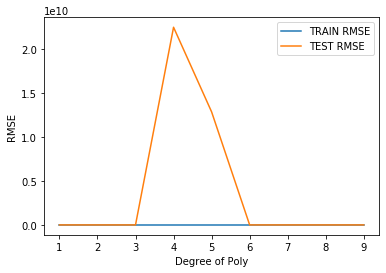

In [63]:
plt.plot(range(1,10),train_rmse_error,label="TRAIN RMSE")
plt.plot(range(1,10),test_rmse_error,label="TEST RMSE")

plt.ylabel("RMSE")
plt.xlabel("Degree of Poly")
plt.legend()

**As we can see the best poly degree is 3 for this model.**

In [64]:
polynomial_converter=PolynomialFeatures(degree=2,include_bias=False)

In [65]:
polynomial_converter.fit(x_scaled)

PolynomialFeatures(degree=2, include_bias=False, interaction_only=False,
                   order='C')

In [66]:
poly_feats=polynomial_converter.transform(x_scaled)

In [67]:
x_train,x_test,y_train,y_test=train_test_split(poly_feats,y,test_size=0.30,random_state=256)

In [68]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
y_pred=lr.predict(x_test)

In [70]:
lr_score=r2_score(y_test,y_pred)

In [71]:
MAE=mean_absolute_error(y_test,y_pred)

In [72]:
MAE

0.5260136967899632

In [73]:
MSE=mean_squared_error(y_test,y_pred)

In [74]:
MSE

0.3996307284871777

In [75]:
RMSE=np.sqrt(MSE)

In [76]:
RMSE

0.6321635298616788

In [77]:
lr_score

0.9841633171856798

## 11.5 Chossing best CV 

In [78]:
from sklearn.model_selection import cross_val_score

In [79]:
for j in range(2,15):
    lr_scores=cross_val_score(lr,x_scaled,y,cv=j)
    lr_s=lr_scores.mean()
    print("At CV:-",j)
    print("Cross validation score is:",lr_scores*100)
    print("r2 Score:",lr_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [90.30192399 87.77033016]
r2 Score: 89.03612707282448


At CV:- 3
Cross validation score is: [90.34818421 86.53184617 90.50470718]
r2 Score: 89.12824585146541


At CV:- 4
Cross validation score is: [88.83550577 91.69007153 85.77993497 89.63566514]
r2 Score: 88.98529435292524


At CV:- 5
Cross validation score is: [87.74092813 91.75147438 92.93553278 81.43948994 89.54829848]
r2 Score: 88.68314474325102


At CV:- 6
Cross validation score is: [87.60326343 91.3956692  90.50894983 84.37667503 89.5009731  90.30224784]
r2 Score: 88.94796307039462


At CV:- 7
Cross validation score is: [86.63551761 91.24366211 90.48565063 93.76265813 79.0864422  87.12014297
 91.57387235]
r2 Score: 88.55827799891048


At CV:- 8
Cross validation score is: [87.54614985 87.4018328  92.69803817 90.10953547 93.13194721 79.43765635
 83.60655528 91.7912797 ]
r2 Score: 88.2153743534047


At CV:- 9
Cross validation score is: [87.57878423 86.2544477  92.25789591 87.73116025 94.0636852

**As we can see the best cv is 6.**

In [80]:
cross_val_score(lr,x_train,y_train,scoring="neg_mean_squared_error",cv=6)

array([-0.53884991, -0.45440372, -0.48327307, -0.1291211 , -0.3133232 ,
       -1.50795928])

In [81]:
lr_cv_score=cross_val_score(lr,x_train,y_train,scoring="neg_mean_squared_error",cv=6).mean()

In [82]:
lr_cv_score

-0.5711550460729885

In [83]:
lr_score=r2_score(y_test,y_pred)

In [84]:
lr_score

0.9841633171856798

## 11.5 Checking overfitting issue.

### 11.5.1 evaluate on the test dataset

In [85]:
test_yhat=lr.predict(x_test)

In [86]:
test_pred=r2_score(y_test,test_yhat)

In [87]:
test_pred

0.9841633171856798

### 11.5.2 evaluate on the train dataset

In [88]:
test_yhat=lr.predict(x_train)

In [89]:
train_pred=r2_score(y_train,test_yhat)

In [90]:
train_pred

0.9854924430532338

**As we can see the train and test score differences is not more, so we can assume model is not overfitting.**

# 12. Ridge Regression

In [91]:
from sklearn.linear_model import Ridge

In [92]:
x_train,x_test,y_train,y_test=train_test_split(poly_feats,y,test_size=0.30,random_state=256)

In [93]:
ridge_model=Ridge(alpha=10)

In [94]:
ridge_model.fit(x_train,y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

## 12.1 Evaluation Matrix

In [95]:
ridge_test_pred=ridge_model.predict(x_test)

In [96]:
ridge_model_score=r2_score(y_test,ridge_test_pred)

In [97]:
MAE=mean_absolute_error(y_test,y_pred)

In [98]:
MAE

0.5260136967899632

In [99]:
MSE=mean_squared_error(y_test,y_pred)

In [100]:
RMSE=np.sqrt(MSE)

In [101]:
RMSE

0.6321635298616788

In [102]:
ridge_model_score

0.9879664666472466

## 12.2 Choose best CV

In [103]:
x_train,x_test,y_train,y_test=train_test_split(poly_feats,y,test_size=0.30,random_state=256)

In [104]:
for j in range(2,15):
    ridge_model_scores=cross_val_score(ridge_model,x_train,y_train,cv=j)
    ridge_model_s=ridge_model_scores.mean()
    print("At CV:-",j)
    print("Cross validation score is:",ridge_model_scores*100)
    print("r2 Score:",ridge_model_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [96.48877425 96.28153162]
r2 Score: 96.38515293163974


At CV:- 3
Cross validation score is: [98.10410986 98.40211069 95.73686064]
r2 Score: 97.41436039612866


At CV:- 4
Cross validation score is: [98.23499388 97.38484759 98.06178014 95.32429492]
r2 Score: 97.25147913123277


At CV:- 5
Cross validation score is: [98.18356754 97.37676263 98.79647986 98.20720001 95.321544  ]
r2 Score: 97.57711080690432


At CV:- 6
Cross validation score is: [98.040421   98.32554652 97.76883177 98.9351142  98.09535228 94.37481146]
r2 Score: 97.59001287223018


At CV:- 7
Cross validation score is: [98.22486603 98.3844244  95.85783327 98.8828577  98.94825642 98.45072811
 93.11912645]
r2 Score: 97.40972748272657


At CV:- 8
Cross validation score is: [98.20869949 98.38663736 96.77064387 98.85014365 99.06896755 97.88585988
 99.03340587 92.61713121]
r2 Score: 97.60268611053458


At CV:- 9
Cross validation score is: [98.04369245 98.5560434  97.84483022 95.47906773 99.190934

**we can choose cv 8.**

In [105]:
cross_val_score(ridge_model,x_train,y_train,scoring="neg_mean_squared_error",cv=8)

array([-0.69038712, -0.30709711, -0.78376972, -0.36338193, -0.22834263,
       -0.53433319, -0.24224053, -1.94159742])

In [106]:
ridge_model_cv_score=cross_val_score(ridge_model,x_train,y_train,scoring="neg_mean_squared_error",cv=8).mean()

In [107]:
ridge_model_cv_score

-0.6363937052382371

In [108]:
ridge_model_score

0.9879664666472466

# 13.1 Random Forest

In [109]:
from sklearn.ensemble import RandomForestRegressor

In [110]:
x_train,x_test,y_train,y_test=train_test_split(poly_feats,y,test_size=0.30,random_state=256)

In [111]:
rfr=RandomForestRegressor()

In [112]:
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [113]:
y_pred=rfr.predict(x_test)

### 13.2 Evaluation Matrix

In [114]:
rfr_score=r2_score(y_test,y_pred)

In [115]:
MAE=mean_absolute_error(y_test,y_pred)

In [116]:
MAE

0.6570499999999991

In [117]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))

In [118]:
RMSE

0.8798535768334798

In [119]:
rfr_score

0.9693220629739777

### 13.3 Choosing best cv

In [120]:
for j in range(2,15):
    rfr_scores=cross_val_score(rfr,x_train,y_train,cv=j)
    rfr_s=rfr_scores.mean()
    print("At CV:-",j)
    print("Cross validation score is:",rfr_scores*100)
    print("r2 Score:",rfr_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [92.70173316 92.43791063]
r2 Score: 92.56982189576122


At CV:- 3
Cross validation score is: [95.04570454 95.97186173 94.67467149]
r2 Score: 95.23074591978468


At CV:- 4
Cross validation score is: [95.77338296 94.62819887 95.66646655 95.08619639]
r2 Score: 95.28856119216066


At CV:- 5
Cross validation score is: [95.86112554 95.31774264 97.35319957 94.6622951  96.47527137]
r2 Score: 95.93392684490267


At CV:- 6
Cross validation score is: [95.91690095 94.76402841 98.01964401 96.00928055 95.75272716 96.30417106]
r2 Score: 96.12779202325969


At CV:- 7
Cross validation score is: [95.49595367 93.76229128 93.90525841 97.38162982 95.88364829 95.40454143
 95.69499089]
r2 Score: 95.36118768593855


At CV:- 8
Cross validation score is: [95.94014948 95.62303444 95.35629538 98.81138334 97.06763107 94.87704826
 95.92117383 95.43048928]
r2 Score: 96.12840063525944


At CV:- 9
Cross validation score is: [96.14969324 96.54504722 94.19486008 96.30060664 98.506754

**We can choose best cv 8.**

In [121]:
cross_val_score(ridge_model,x_train,y_train,scoring="neg_mean_squared_error",cv=8)

array([-0.69038712, -0.30709711, -0.78376972, -0.36338193, -0.22834263,
       -0.53433319, -0.24224053, -1.94159742])

In [122]:
rfr_cv_score=cross_val_score(ridge_model,x_train,y_train,scoring="neg_mean_squared_error",cv=8).mean()

In [123]:
rfr_cv_score

-0.6363937052382371

In [124]:
rfr_score

0.9693220629739777

# 14.1 Choosing best model with CV score

In [125]:
Multiplelinear_Regression={"R2 Score":round(lr_score,2),
                    "CV Score":round(lr_cv_score,2),
                    "Difference":lr_score-lr_cv_score}
Ridge_Regression={"R2 Score":round(ridge_model_score,2),
                    "CV Score":round(ridge_model_cv_score,2),
                    "Difference":lr_score-lr_cv_score}
Random_Forest={"R2 Score":round(rfr_score,2),
                    "CV Score":round(rfr_cv_score,2),
                    "Difference":rfr_score-rfr_cv_score}


In [126]:
data=np.array([[lr_score,lr_cv_score,lr_score-lr_cv_score],[ridge_model_score,ridge_model_cv_score,ridge_model_score-ridge_model_cv_score],[rfr_score,rfr_cv_score,rfr_score-rfr_cv_score]])

In [127]:
index_value=["MultiLinear Regression","Ridge Regression","RandomForest Regression"]

In [128]:
columns_value=["r2 Score","Cross Validation Score","Difference"]

In [129]:
model_selection=pd.DataFrame(data=data,
                            index=index_value,
                            columns=columns_value)

In [130]:
model_selection

,r2 Score,Cross Validation Score,Difference
MultiLinear Regression,0.984163,-0.571155,1.555318
Ridge Regression,0.987966,-0.636394,1.624360
RandomForest Regression,0.969322,-0.636394,1.605716


**As we can see linear Regression model score and cross validation score differences are less.**

# 15 Saving Model

### 15.1 Saving model 

In [131]:
import pickle

In [132]:
filename="advertising_predict.pkl"

In [133]:
pickle.dump(lr,open(filename,"wb"))

### 15.2 Saving polyconvertor

In [134]:
filename="adverpolyconvertor.pkl"
pickle.dump(poly_feats,open(filename,"wb"))